# **EECS 16ML Assignment: Traditional/Contextual Word Embedding**

Before you start, make sure you review the lecture slide and notes about word embedding.

In [1]:
# All Import Statements Defined Here
# Note: Do not add to this list.
# ----------------

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem.porter import PorterStemmer
# if error appears, uncomment the next line
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
from collections import Counter

# ----------------

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cathyxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def preprocess_text(review):
    # remove HTML contents.
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text()

    # remove everything except lower/upper case letters using Regular Expressions.
    review = re.sub('\[[^]]*\]', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)

  # bring everything into lowercase.
    review = review.lower()

    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    return review


In [3]:
# Reading the dataset and visualize the first ten data points
path_data = 'IMDB Dataset.csv'
imdb_data=pd.read_csv(path_data)
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# Split the dataset into train and testing dataset
X_raw = imdb_data['review'][:5000]
y = imdb_data['sentiment'][:5000]

#tqdm.pandas()
#X = X_raw.progress_apply(preprocess_text)

### **Part 1: Word-Count Vectors**

In [ ]:
def tokenize(text):
    """
  Given several pieces of text, create a list of unique word tokens included in all the texts
  """
    return

def vectorize(tokens):
    return

### **Part 2: TFIDF**

In [ ]:
# This function computes the term frequency (TF), i.e. the number of times a word appears in a review divded 
# by the total number of words in the review.
# Input: bagOfWords - a list containing all the words in a review
# Output: tfDict - a dictionary containing the TF scores of all the words in a review
def computeTF(bagOfWords):
    # Frequency of each word in a review
    wordDict = dict(Counter(bagOfWords))
    tfDict = {}
    N = len(bagOfWords)
  # TODO: compute term frequency
  # Hint: Don't forget to apply logarithm transformation 
    for word, count in wordDict.items():
        tfDict[word] = np.log(1+count / float(N))
    return tfDict

# This function computes the inverse document frequency (IDF), i.e. the number of reviews divided by the number 
# of reviews that contain the word w. 
# Input: reviews - a list containing all the reviews
# Output: idfDict - a dictionary containing the IDF score of all the words in all the reviews
def computeIDF(reviews):
    N = len(reviews)
    reviews = [dict(Counter(review)) for review in reviews]
    idfDict = dict.fromkeys(set().union(*(review.keys() for review in reviews)),0)
        
  # TODO: compute inverse document frequency
  # Hint: Don't forget to apply logarithm transformation 

    for document in reviews:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = np.log(N / float(val))
    return idfDict

# This function computes the TF-IDF score of all the words in a review
# Input: bagOfWords - a list containing all the words in a review
#        idfDict - a dictionary containing the IDF score of all the words in all the reviews
# Output: tfidf - a dictionary containing the TF-IDF scores of all the words in a review
def computeTFIDF(bagOfWords, idfDict):
    tfidf = {}  
    tfDict = computeTF(bagOfWords)
  # TODO: compute tf-idf
    for word, val in tfDict.items():
        tfidf[word] = val * idfs[word]
  
    return tfidf



In [ ]:
idfs = computeIDF(X)
total_vocab = list(idfs.keys())
tfidf = X.progress_apply(computeTFIDF, idfDict=idfs)

In [ ]:
def vectorized(tfidf_doc):
    vec = np.zeros(len(total_vocab))
    for word, val in tfidf_doc.items():
        ind = total_vocab.index(word)
        vec[ind] = val
    return vec

In [ ]:
X_vectorized = tfidf.progress_apply(vectorized)

In [ ]:
 from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(list(X_vectorized), y, test_size = 0.2,
                                                    random_state = 0)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('\n Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer()
#transformed train reviews
tv_train_reviews=tv.fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(tv_train_reviews, y, test_size = 0.2,
                                                    random_state = 0)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('\n Accuracy: ', accuracy_score(y_test, y_pred))

###**Part 3: Word2vec**

**Beyond Word2vec: Capturing Word Context**

In [ ]:
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [ ]:
def vectorize_word2vec(X):
    count = 0
    X_vectorized = []
    for i in range(len(X)):
        X_words = []
        for word in X[i]:
            if word in model:
                X_words.append(model[word])
                
            else:
                X_words.append(np.zeros(300)) 
                count += 1
        X_vectorized.append(np.sum(np.array(X_words), axis = 0).reshape(-1))
    print(count)
    return np.array(X_vectorized)

In [ ]:
X_vectorized = vectorize_word2vec(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2,
                                                    random_state = 0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(alpha=1e-5, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))

In [92]:
import transformers as ppb

# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
model.eval()

tokenized = X_raw.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True)))

In [93]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded.shape

(5000, 512)

In [94]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(5000, 512)

In [95]:
import torch
from torch.utils.data import DataLoader, Dataset

In [96]:
class BertDataset(Dataset):
    
    def __init__(self, input_ids, attn_masks):
        assert(len(input_ids) == len(attn_masks))
        self.input_ids = input_ids
        self.attn_masks = attn_masks
    
    def __getitem__(self, index):
        return (torch.tensor(self.input_ids[index]), torch.tensor(self.attn_masks[index]))
        
    def __len__(self):
        return len(self.input_ids)

In [97]:
train_bert_dataset = BertDataset(padded, attention_mask)
train_bert_dataloader = DataLoader(train_bert_dataset, batch_size=8, shuffle=True)

In [99]:
last_hidden_states = []
with torch.no_grad():
    for i, (input_ids, attn_mask) in enumerate(train_bert_dataloader):
        if i % 10 == 0:
            print(i,input_ids.shape, attn_mask.shape)
        last_hidden_states.append(model(input_ids, attention_mask=attn_mask, return_dict=True))

0 torch.Size([8, 512]) torch.Size([8, 512])
10 torch.Size([8, 512]) torch.Size([8, 512])
20 torch.Size([8, 512]) torch.Size([8, 512])
30 torch.Size([8, 512]) torch.Size([8, 512])
40 torch.Size([8, 512]) torch.Size([8, 512])
50 torch.Size([8, 512]) torch.Size([8, 512])
60 torch.Size([8, 512]) torch.Size([8, 512])
70 torch.Size([8, 512]) torch.Size([8, 512])
80 torch.Size([8, 512]) torch.Size([8, 512])
90 torch.Size([8, 512]) torch.Size([8, 512])
100 torch.Size([8, 512]) torch.Size([8, 512])
110 torch.Size([8, 512]) torch.Size([8, 512])
120 torch.Size([8, 512]) torch.Size([8, 512])
130 torch.Size([8, 512]) torch.Size([8, 512])
140 torch.Size([8, 512]) torch.Size([8, 512])
150 torch.Size([8, 512]) torch.Size([8, 512])
160 torch.Size([8, 512]) torch.Size([8, 512])
170 torch.Size([8, 512]) torch.Size([8, 512])
180 torch.Size([8, 512]) torch.Size([8, 512])
190 torch.Size([8, 512]) torch.Size([8, 512])
200 torch.Size([8, 512]) torch.Size([8, 512])
210 torch.Size([8, 512]) torch.Size([8, 512])

KeyboardInterrupt: 

In [75]:
features = last_hidden_states[0][0][:,0,:].numpy()
for i in range(1,len(last_hidden_states)):
    features = np.concatenate((features, last_hidden_states[i][0][:,0,:].numpy()),axis=0)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2,
                                                    random_state = 0)

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes = (100,100),max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('\n Accuracy: ', accuracy_score(y_test, y_pred))


 Accuracy:  0.53


In [34]:
import re,string,unicodedata
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

imdb_data.sentiment.replace("positive" , 1 , inplace = True)
imdb_data.sentiment.replace("negative" , 0 , inplace = True)
imdb_data.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


In [35]:
x_train,x_test,y_train,y_test = train_test_split(imdb_data.review[:5000],imdb_data.sentiment[:5000],random_state = 0 , stratify = imdb_data.sentiment[:5000])

In [36]:
from tokenizers import BertWordPieceTokenizer
import keras
import tensorflow as tf
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch
import transformers
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower = True)
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [37]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=400):

    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding()
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        
        all_ids.extend([enc.ids for enc in encs])

    res = np.zeros((len(all_ids), maxlen))
    for x in range(len(all_ids)):
        for y in range(len(all_ids[x])):
            res[x][y] = all_ids[x][y]
    return res

In [38]:
x_train = fast_encode(x_train.values, fast_tokenizer, maxlen=400)
x_test = fast_encode(x_test.values, fast_tokenizer, maxlen=400)

In [39]:
def build_model(transformer, max_len=400):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [40]:
bert_model = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [11]:
model = build_model(bert_model, max_len=400)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 400)]             0         
_________________________________________________________________
tf_distil_bert_model (TFDist ((None, 400, 768),)       66362880  
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 66,363,649
Trainable params: 66,363,649
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train,batch_size = 32 ,validation_data=(x_test,np.array(y_test)),epochs = 3)

Epoch 1/3
118/118 [==============================] - 2752s 23s/step - loss: 0.6317 - accuracy: 0.6096 - val_loss: 0.4796 - val_accuracy: 0.7784
Epoch 2/3
118/118 [==============================] - 3102s 26s/step - loss: 0.3661 - accuracy: 0.8427 - val_loss: 0.3306 - val_accuracy: 0.8440
Epoch 3/3
118/118 [==============================] - 3032s 26s/step - loss: 0.2333 - accuracy: 0.9099 - val_loss: 0.3545 - val_accuracy: 0.8544


In [15]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

40/40 [==============================] - 242s 6s/step - loss: 0.3545 - accuracy: 0.8544
Accuracy of the model on Testing Data is -  85.43999791145325 %


In [6]:
model.save_weights("bert_model")

NameError: name 'model' is not defined

In [41]:
a = build_model(bert_model, max_len=400)
a.load_weights("bert_model")
print("Accuracy of the model on Testing Data is - " , a.evaluate(x_test,y_test)[1] , "%")

40/40 [==============================] - 240s 6s/step - loss: 0.3545 - accuracy: 0.8544
Accuracy of the model on Testing Data is -  0.8543999791145325 %


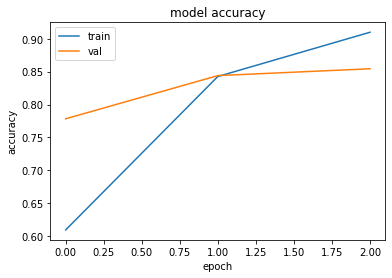

In [45]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()
from matplotlib import pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
history

{'loss': [0.6316890716552734, 0.36613354086875916, 0.23334290087223053],
 'accuracy': [0.6096000075340271, 0.8426666855812073, 0.9098666906356812],
 'val_loss': [0.47957319021224976, 0.33058369159698486, 0.3545358180999756],
 'val_accuracy': [0.7784000039100647, 0.843999981880188, 0.8543999791145325]}